# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [50]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [51]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 596


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [52]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&units=metric&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = (requests.get(city_url)).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat =city_weather['coord']['lat'] 
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | nishinoomote
Processing Record 2 of Set 1 | bredasdorp
Processing Record 3 of Set 1 | puerto natales
Processing Record 4 of Set 1 | hermanus
Processing Record 5 of Set 1 | laguna
Processing Record 6 of Set 1 | invercargill
Processing Record 7 of Set 1 | salalah
Processing Record 8 of Set 1 | waitangi
Processing Record 9 of Set 1 | kalabo
Processing Record 10 of Set 1 | thunder bay
Processing Record 11 of Set 1 | bethel
Processing Record 12 of Set 1 | ust-nera
Processing Record 13 of Set 1 | avarua
Processing Record 14 of Set 1 | adamstown
Processing Record 15 of Set 1 | la'ie
Processing Record 16 of Set 1 | 'ohonua
City not found. Skipping...
Processing Record 17 of Set 1 | kodiak
Processing Record 18 of Set 1 | horsham
Processing Record 19 of Set 1 | sumbawa besar
Processing Record 20 of Set 1 | ribeira grande
Processing Record 21 of Set 1 | port-aux-francais
Processing Record 22 of Set 1 | luga

Processing Record 38 of Set 4 | howard springs
Processing Record 39 of Set 4 | leua
Processing Record 40 of Set 4 | kone
Processing Record 41 of Set 4 | ust-tsilma
Processing Record 42 of Set 4 | mugia
Processing Record 43 of Set 4 | barah
Processing Record 44 of Set 4 | hasaki
Processing Record 45 of Set 4 | broken hill
Processing Record 46 of Set 4 | cozumel
Processing Record 47 of Set 4 | tiaret
Processing Record 48 of Set 4 | tabou
Processing Record 49 of Set 4 | stanley
Processing Record 0 of Set 5 | ninotsminda
Processing Record 1 of Set 5 | vanimo
Processing Record 2 of Set 5 | aksu
Processing Record 3 of Set 5 | nicoya
Processing Record 4 of Set 5 | nagqu
Processing Record 5 of Set 5 | itamaraca
Processing Record 6 of Set 5 | santa ana de yacuma
Processing Record 7 of Set 5 | muzayri'
City not found. Skipping...
Processing Record 8 of Set 5 | abraham's bay
City not found. Skipping...
Processing Record 9 of Set 5 | arno
Processing Record 10 of Set 5 | qamdo
Processing Record 11 

Processing Record 27 of Set 8 | mount gambier
Processing Record 28 of Set 8 | lianran
Processing Record 29 of Set 8 | gizo
Processing Record 30 of Set 8 | sakaiminato
Processing Record 31 of Set 8 | palikir - national government center
Processing Record 32 of Set 8 | kinablangan
Processing Record 33 of Set 8 | barra de santo antonio
Processing Record 34 of Set 8 | kapuskasing
Processing Record 35 of Set 8 | newberry
Processing Record 36 of Set 8 | hami
Processing Record 37 of Set 8 | al kharijah
Processing Record 38 of Set 8 | dehui
Processing Record 39 of Set 8 | leh
Processing Record 40 of Set 8 | dalianwan
Processing Record 41 of Set 8 | fonadhoo
City not found. Skipping...
Processing Record 42 of Set 8 | mangrol
Processing Record 43 of Set 8 | tanjung selor
City not found. Skipping...
Processing Record 44 of Set 8 | queenstown
Processing Record 45 of Set 8 | amesbury
Processing Record 46 of Set 8 | kertih
Processing Record 47 of Set 8 | taltal
Processing Record 48 of Set 8 | pyapon

Processing Record 15 of Set 12 | boiro
Processing Record 16 of Set 12 | westport
Processing Record 17 of Set 12 | kapit
Processing Record 18 of Set 12 | girvan
Processing Record 19 of Set 12 | villa gesell
Processing Record 20 of Set 12 | canutama
Processing Record 21 of Set 12 | kuraymah
Processing Record 22 of Set 12 | kelso
Processing Record 23 of Set 12 | gazojak
Processing Record 24 of Set 12 | goundam
Processing Record 25 of Set 12 | ta`u
Processing Record 26 of Set 12 | ocean city
Processing Record 27 of Set 12 | salekhard
Processing Record 28 of Set 12 | moultonborough
Processing Record 29 of Set 12 | banda aceh
Processing Record 30 of Set 12 | bam
Processing Record 31 of Set 12 | yuzhno-kurilsk
Processing Record 32 of Set 12 | san pedro pochutla
Processing Record 33 of Set 12 | pico truncado
Processing Record 34 of Set 12 | espargos
City not found. Skipping...
Processing Record 35 of Set 12 | udachny
Processing Record 36 of Set 12 | tongliao
Processing Record 37 of Set 12 | ma

In [ ]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

In [54]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,nishinoomote,30.7333,131.0000,23.23,95,100,7.98,JP,1686522591
1,bredasdorp,-34.5322,20.0403,14.04,79,100,5.65,ZA,1686522591
2,puerto natales,-51.7236,-72.4875,4.74,85,82,7.78,CL,1686522591
3,hermanus,-34.4187,19.2345,15.45,91,100,9.72,ZA,1686522591
4,laguna,38.4210,-121.4238,30.80,47,0,4.63,US,1686522591


In [55]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [56]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,nishinoomote,30.7333,131.0000,23.23,95,100,7.98,JP,1686522591
1,bredasdorp,-34.5322,20.0403,14.04,79,100,5.65,ZA,1686522591
2,puerto natales,-51.7236,-72.4875,4.74,85,82,7.78,CL,1686522591
3,hermanus,-34.4187,19.2345,15.45,91,100,9.72,ZA,1686522591
4,laguna,38.4210,-121.4238,30.80,47,0,4.63,US,1686522591


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

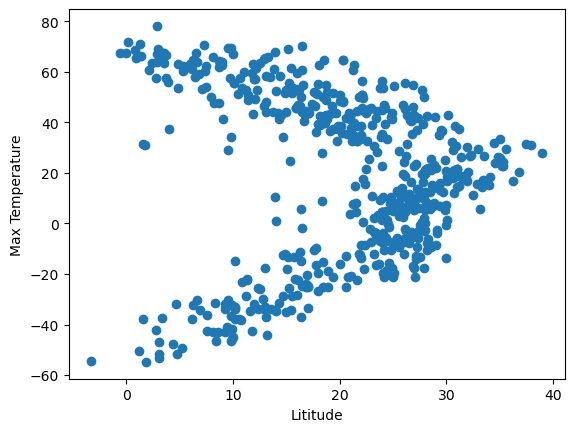

In [57]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Max Temp"], city_data_df["Lat"])

# Incorporate the other graph properties
plt.xlabel("Lititude")
plt.ylabel("Max Temperature")
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

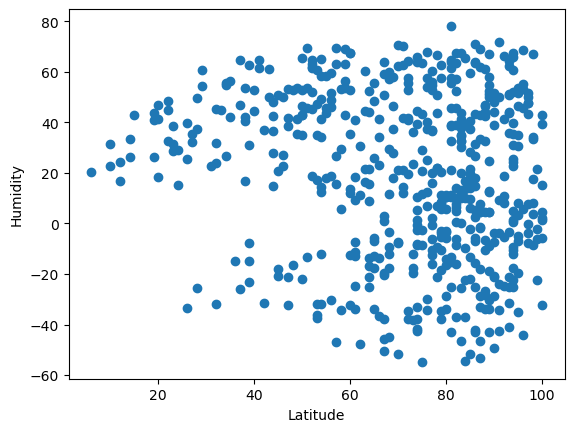

In [58]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Humidity"], city_data_df["Lat"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

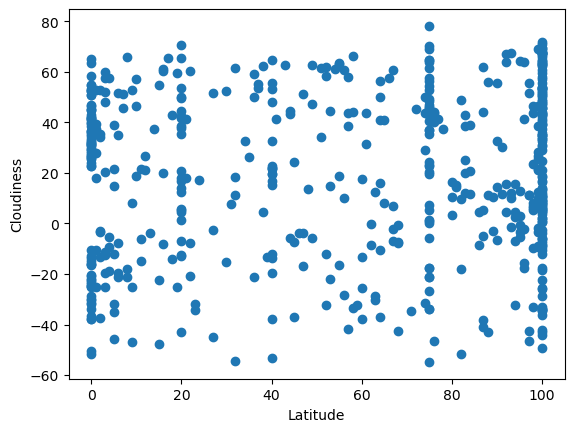

In [59]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Cloudiness"],city_data_df["Lat"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

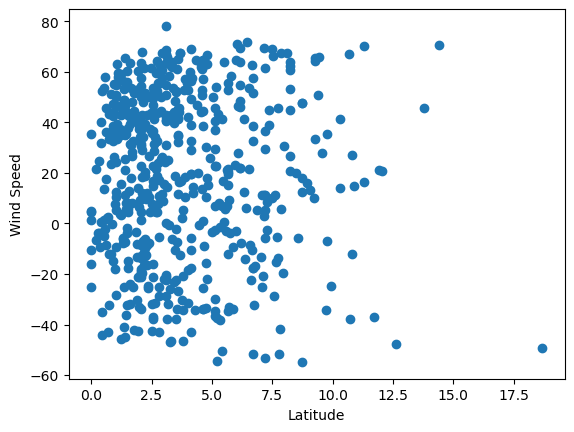

In [60]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Wind Speed"], city_data_df["Lat"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [95]:
# Define a function to create Linear Regression plots
def linear_regression(x,y,eqn_coordinates):
    (slope,intercept,rvalue,pvalue,stderr)=linregress(x,y)
    regress_values = x*slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    print(line_eq)
  
    plt.scatter(x, y)
    plt.plot(x, regress_values, "r-")
    plt.annotate(line_eq, eqn_coordinates, fontsize=15, color="red")
    plt.xlabel(f"{x.name}")
    plt.ylabel(f"{y.name}")
    print(f"The r-value is: {rvalue**2}")
    plt.show()
    

In [87]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,nishinoomote,30.7333,131.0000,23.23,95,100,7.98,JP,1686522591
4,laguna,38.4210,-121.4238,30.80,47,0,4.63,US,1686522591
6,salalah,17.0151,54.0924,30.05,84,40,2.57,OM,1686522592
9,thunder bay,48.4001,-89.3168,19.99,22,75,6.17,CA,1686522592
10,bethel,41.3712,-73.4140,26.87,54,0,3.60,US,1686522592


In [88]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df= city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,bredasdorp,-34.5322,20.0403,14.04,79,100,5.65,ZA,1686522591
2,puerto natales,-51.7236,-72.4875,4.74,85,82,7.78,CL,1686522591
3,hermanus,-34.4187,19.2345,15.45,91,100,9.72,ZA,1686522591
5,invercargill,-46.4000,168.3500,8.37,87,97,3.30,NZ,1686522592
7,waitangi,-43.9535,-176.5597,13.23,96,100,0.45,NZ,1686522592


###  Temperature vs. Latitude Linear Regression Plot

y = -0.32x + 32.27
The r-value is: 0.5084800958759115


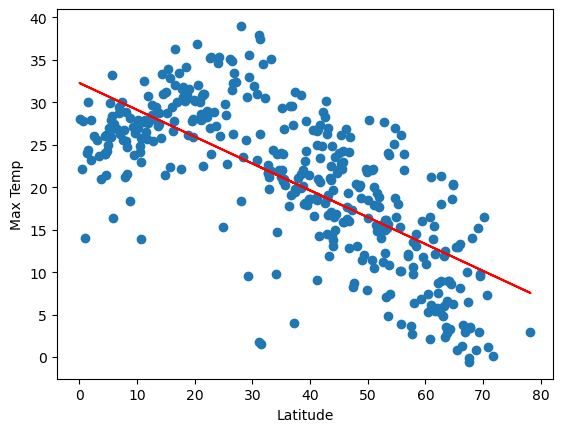

In [96]:
# Linear regression on Northern Hemisphere
linear_regression(northern_hemi_df["Lat"].rename("Latitude"), northern_hemi_df["Max Temp"],(10,-30))

y = 0.48x + 28.26
The r-value is: 0.7605108791749302


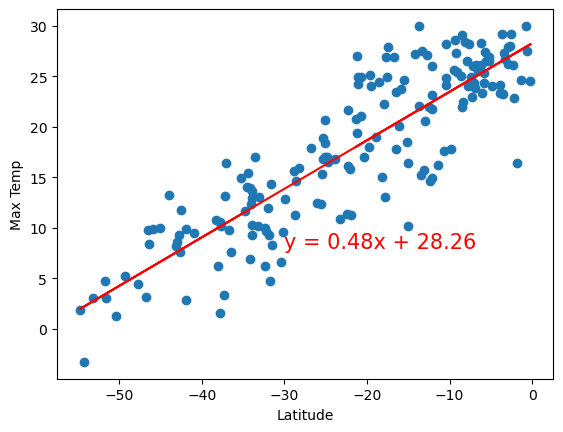

In [102]:
# Linear regression on Southern Hemisphere
linear_regression(southern_hemi_df["Lat"].rename("Latitude"), southern_hemi_df["Max Temp"],(-30,8))

**Discussion about the linear relationship:** 
As some cities in the southern hemisphere move closer to the equator, temperatures rise.
This proves a slight positive correlation between latitude and temperature in the southern hemisphere.
As cities in the northern hemisphere move closer to the north pole and farther from the equator, temperatures drop.
This proves a strong negative correlation between latitude and tempuratures in the northern hemisphere.

### Humidity vs. Latitude Linear Regression Plot

y = -0.13x + 74.01
The r-value is: 0.01429645847819677


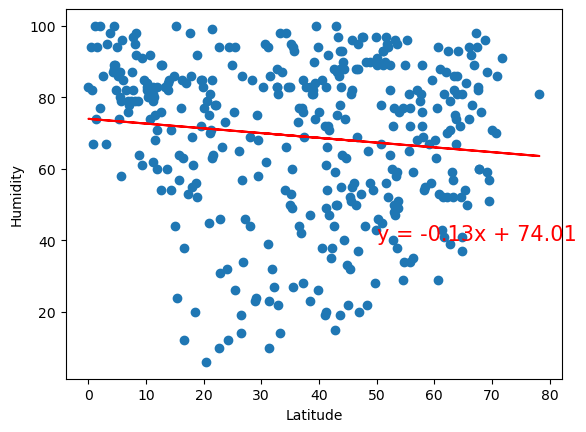

In [105]:
# Northern Hemisphere
linear_regression(northern_hemi_df["Lat"].rename("Latitude"), northern_hemi_df["Humidity"],(50, 40))

y = 0.13x + 78.69
The r-value is: 0.012376111887689724


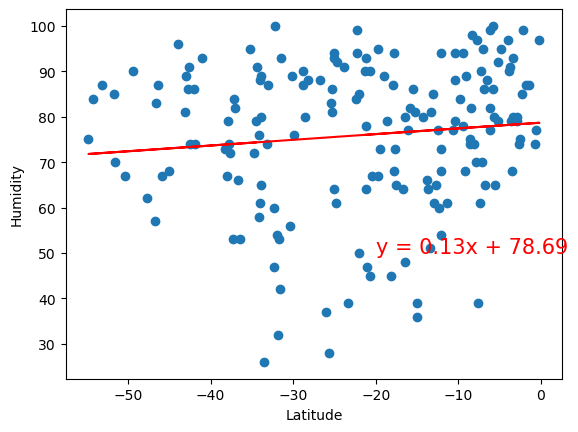

In [106]:
# Southern Hemisphere
linear_regression(southern_hemi_df["Lat"].rename("Latitude"), southern_hemi_df["Humidity"],(-20,50))

**Discussion about the linear relationship:** 
There is a little correlation between humidity and latitude for cities in the southern hemisphere.
There is a slight positive correlation between humidity and latitude for cities in the northern hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

y = -0.18x + 66.49
The r-value is: 0.00860518758354445


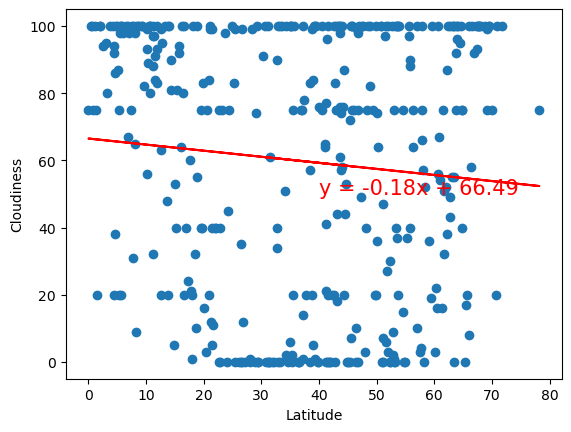

In [110]:
# Northern Hemisphere
linear_regression(northern_hemi_df["Lat"].rename("Latitude"), northern_hemi_df["Cloudiness"],(40,50))

y = 0.16x + 53.11
The r-value is: 0.0034701182618091094


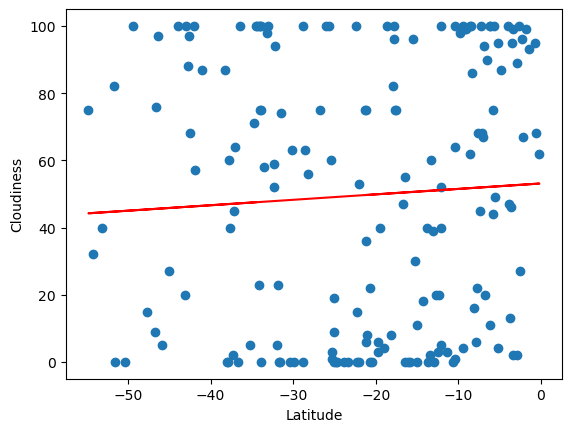

In [111]:
# Southern Hemisphere
linear_regression(southern_hemi_df["Lat"].rename("Latitude"), southern_hemi_df["Cloudiness"],(50,50))

**Discussion about the linear relationship:** 
There is a little correlation between cloudiness and latitude for cities in the southern hemisphere.
There is a slight positive correlation between cloudiness and latitude for cities in the northern hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

y = 0.01x + 3.45
The r-value is: 0.004432770318046248


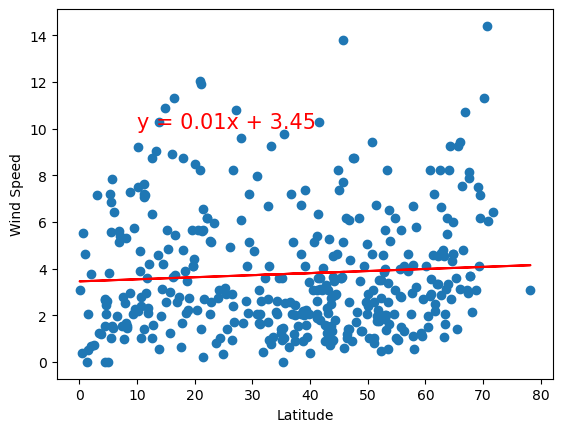

In [114]:
# Northern Hemisphere
linear_regression(northern_hemi_df["Lat"].rename("Latitude"), northern_hemi_df["Wind Speed"],(10,10))

y = -0.04x + 2.86
The r-value is: 0.04693719232509857


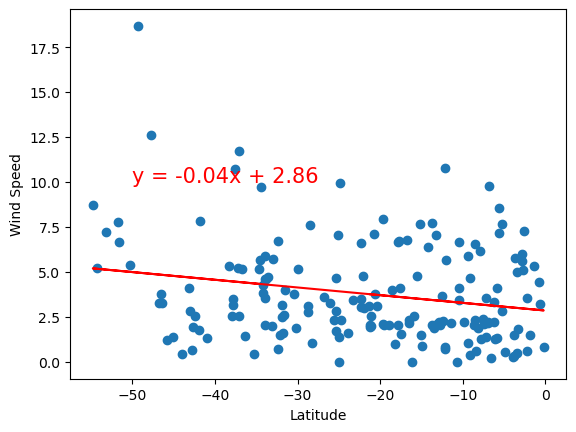

In [115]:
# Southern Hemisphere
linear_regression(southern_hemi_df["Lat"].rename("Latitude"), southern_hemi_df["Wind Speed"],(-50,10))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

There is a slightly negative correlation between wind speed and latitude for cities in the southern hemisphere.
There is a little correlation between wind speed and latitude for cities in the northern hemisphere.